# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post]() by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data

The dataset contains both information on marketing newsletters/e-mail campaigns (e-mail offers sent) and transaction level data from customers (which offer customers responded to and what they bought).

In [3]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

**Your turn:** Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):

* customer_name
* One column for each offer, with a 1 if the customer responded to the offer

In [5]:
#your turn
# First we setup a table using data from df_transactions using a pivot table, in which each row is an unique customer and the columns indicate whether a customer responded to the offer
df_table=pd.pivot_table(df_transactions,index='customer_name',columns=['offer_id'],fill_value=0);
# Second, we collapse across n, which is not useful for this analysis.
df_table.columns=df_table.columns.droplevel(); 

# Now we'll merge this table with a pandas array that contains the customer name as the first column entry followed by each offer
columnLabels = ['customer_name'];
[columnLabels.append(columnLabel) for columnLabel in df_table.columns];
dataTable=pd.DataFrame([],columns=columnLabels);
dataTable=pd.merge(dataTable,df_table,how='outer')
dataTable['customer_name']=df_table.index.values;
dataTable

,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,Baker,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,Barnes,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,Bell,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,Bennett,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,Brooks,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
9,Brown,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


## K-Means Clustering

**Your turn:** 

* Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
* Apply the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. Use `n_clusters=5` (but feel free to play with this)
* Print the number of points in each cluster 

In [6]:
#your turn

# A numpy matrix x_cols with only the columns representing the offers (i.e. the 0/1 colums)
dataArray = dataTable.values[:,1:]; # 100 x 32 array

# We'll apply K-Means clustering  with different initial states, and plot how the number of points in each cluster changes.
from sklearn.cluster import KMeans
numberOfClusters   = 5;
numberOfIterations = 5;
for iteration in range(numberOfIterations):
    # Setup k-means clustering, and apply the KMeans clustering method from scikit-learn to the above matrix. 
    kMeansClusters=KMeans(n_clusters=numberOfClusters,random_state=iteration);
    kMeansClusters.fit(dataArray);

    # Print the number of points in each cluster
    [pointsPerCluster,histEdge]=np.histogram(kMeansClusters.labels_,bins=numberOfClusters);
    print "Iteration {} - Elements in each cluster: {}".format(iteration+1,pointsPerCluster)

Iteration 1 - Elements in each cluster: [15 38 12  6 29]
Iteration 2 - Elements in each cluster: [ 3 25 37 20 15]
Iteration 3 - Elements in each cluster: [16 14 24 31 15]
Iteration 4 - Elements in each cluster: [14 18 21 32 15]
Iteration 5 - Elements in each cluster: [24 15 33 12 16]


## Visualizing clusters using PCA

How do we visualize clusters? Principal Component Analysis (PCA) will help. There are lots of uses for PCA, but today we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset. Why you ask? Well once it is in 2 dimensions (or simply put, it has 2 columns), it becomes much easier to plot!

**Your turn:** Use PCA to plot your clusters:

* Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
* Create a data frame with the following fields:
  * customer name
  * cluster id the customer belongs to
  * the two PCA components (label them `x` and `y`)

In [7]:
#your turn

# Use scikit-learn's PCA function to reduce the dimensionality of your clustering data to 2 components
from sklearn.decomposition import PCA
pcaClustering = PCA(n_components=2);
pcaValues=pcaClustering.fit_transform(dataArray)

# We create a data frame with the following fields: customer name, cluster id the customer belongs to, the two PCA components (labeled x and y)
clusteringData=pd.DataFrame([],columns=['customer_name','cluster_id','x','y']);
clusteringData['customer_name']=df_table.index.values;
clusteringData['cluster_id']=kMeansClusters.labels_;
clusteringData['x']=pcaValues[:,0];
clusteringData['y']=pcaValues[:,1];
clusteringData

,customer_name,cluster_id,x,y
0,Adams,0,1.007580,-0.108215
1,Allen,2,-0.287539,-0.044715
2,Anderson,4,-0.392032,-1.038391
3,Bailey,4,-0.392032,-1.038391
4,Baker,4,-0.392032,-1.038391
5,Barnes,0,0.699477,0.022542
6,Bell,1,0.088183,0.471695
7,Bennett,1,-0.485282,0.725503
8,Brooks,4,-0.591941,-1.506500
9,Brown,4,-0.591941,-1.506500


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We'll color code each point based on it's cluster so it's easier to see them.

**Your turn:**

* Plot a scatterplot of the `x` vs `y` columns
* Color-code points differently based on cluster ID

How do the clusters look?

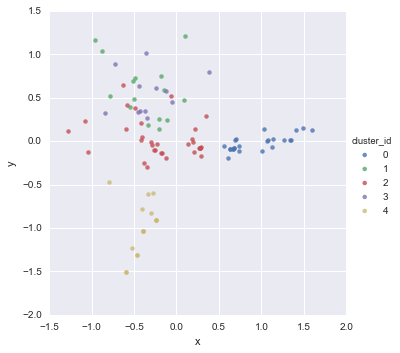

In [8]:
#your turn
sns.lmplot('x', 'y', data=clusteringData, fit_reg=False, hue="cluster_id")

The cluster divisions for K-Means line up pretty well using just the first two principal components. Nonetheless, clusters 1-3 show some overlap, which suggests that the clustering divisions being visualized aren't being perfectly described by from plotting the data on the first two principal components.

**Your turn (extra credit):** Play with the following: 

* Different initializations for `KMeans`
* Other clustering algorithms in scikit-learn

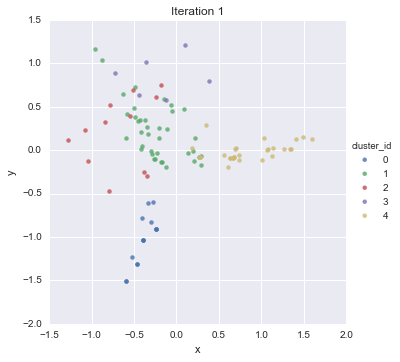

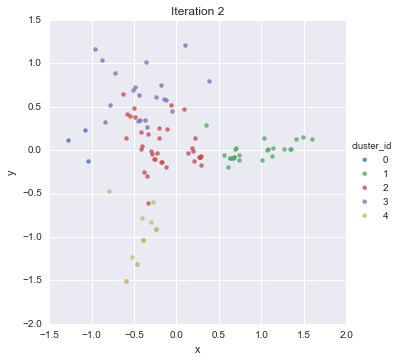

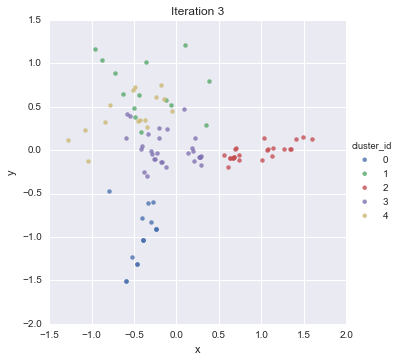

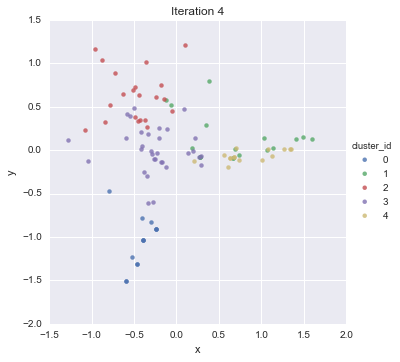

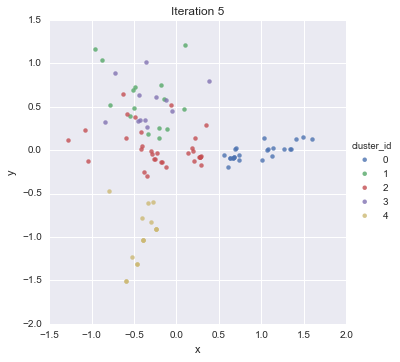

In [9]:
# We'll apply K-Means clustering with different initial states, and plot how the clusters change.
from matplotlib.pylab import plt
numberOfClusters   = 5;
numberOfIterations = 5;
for iteration in range(numberOfIterations):
    # Setup k-means clustering, and apply the KMeans clustering method from scikit to learn the above matrix. 
    kMeansClusters=KMeans(n_clusters=numberOfClusters,random_state=iteration);
    kMeansClusters.fit(dataArray);

    # Use scikit-learn's PCA function to reduce the dimensionality of your clustering data to 2 components
    pcaClustering = PCA(n_components=2);
    pcaValues=pcaClustering.fit_transform(dataArray)

    # Next create a data frame with the following fields: customer name, cluster id the customer belongs to, the two PCA components (labeled x and y)
    clusteringData=pd.DataFrame([],columns=['customer_name','cluster_id','x','y']);
    clusteringData['customer_name']=df_table.index.values;
    clusteringData['cluster_id']=kMeansClusters.labels_;
    clusteringData['x']=pcaValues[:,0];
    clusteringData['y']=pcaValues[:,1];
    
    # Plot the data into different subplots
    sns.lmplot('x', 'y', data=clusteringData, fit_reg=False, hue="cluster_id")
    plt.title("Iteration {}".format(iteration+1));

Based on the above simulations, we can see how the initial random seed has a profound impact on the clustering. For example, the cluster of the right-most cluster of points (x>0.5) is the same across most of the iterations, but completely changes on Iteration 4 (likely due to multiple seed points being placed in this cluster).

In [10]:
# Code to setup colors before trying next set of simulations
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

def getColor(currentColor,numberOfColors=64,colormap='jet'):
    "returns an unique color for each cluster"
    scalarMap = cmx.ScalarMappable(norm=colors.Normalize(vmin=0, vmax=numberOfColors), cmap=plt.get_cmap(colormap))
    return scalarMap.to_rgba(currentColor)

C:\Program Files\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


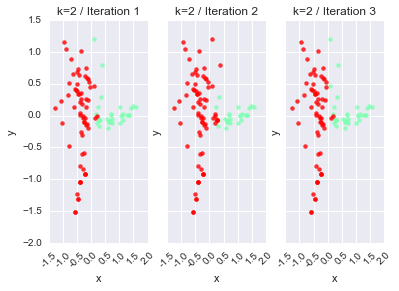

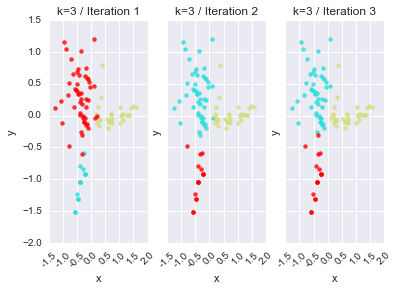

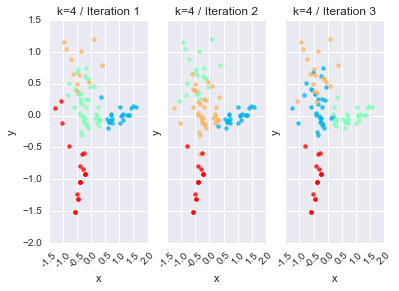

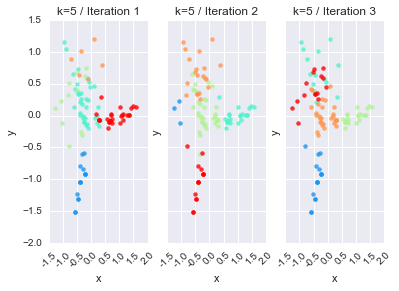

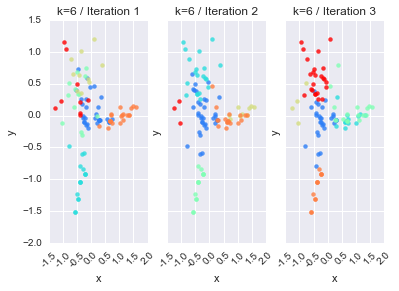

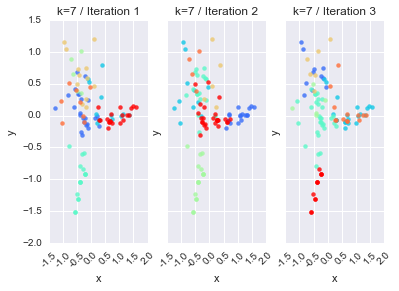

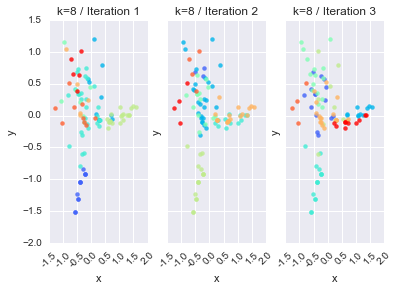

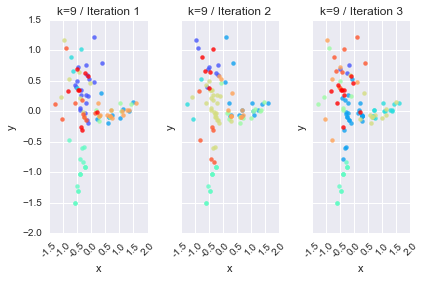

In [11]:
# We'll apply K-Means clustering with different number of clusters (k), and plot how the results change (subplots will denote different seeds).
numberOfIterations = 3;
for clusterSize in range(2,10):
    # Setup the master figure;
    f, axes = plt.subplots(1, numberOfIterations, sharey=True);
    for iteration, axis in enumerate(axes):
        # Setup k-means clustering, and apply the KMeans clustering method from scikit to learn the above matrix. 
        kMeansClusters=KMeans(n_clusters=clusterSize,random_state=iteration);
        kMeansClusters.fit(dataArray);

        # Use scikit-learn's PCA function to reduce the dimensionality of your clustering data to 2 components
        pcaClustering = PCA(n_components=2);
        pcaValues=pcaClustering.fit_transform(dataArray)

        # Next create a data frame with the following fields: customer name, cluster id the customer belongs to, the two PCA components (labeled x and y)
        clusteringData=pd.DataFrame([],columns=['customer_name','cluster_id','x','y']);
        clusteringData['customer_name']=df_table.index.values;
        clusteringData['cluster_id']=kMeansClusters.labels_;
        clusteringData['x']=pcaValues[:,0];
        clusteringData['y']=pcaValues[:,1];

        # Plot the data into different subplots
        for currentCluster in range(clusterSize):
            sns.regplot('x', 'y', data=clusteringData[clusteringData['cluster_id']==currentCluster], fit_reg=False, color=getColor(currentCluster+1,clusterSize,'rainbow'), scatter_kws={"label": currentCluster}, ax=axis)
        axis.set_title("k={} / Iteration {}".format(clusterSize,iteration+1));
        axis.set_xticklabels(axis.get_xticks(),rotation=45);
        axis.legend(title='cluster_id',loc='center left', bbox_to_anchor=(1, 0.5))
f.tight_layout();

Based on changing the number of clusters (k), we can see a dramatic change in the stability of the output of k-means. Interestingly, lower levels of k like 2 or 3 led to the most stable clusters in the sense that there was less apparent overlap between cluster boundaries as defined by each cluster's convex hull. And at least based on using the first two principal components to visualize the clusters, these lower values of k seem to result in the most likely division of clusters. Higher values of k (>3) resulted in progressively less realistic clusters.

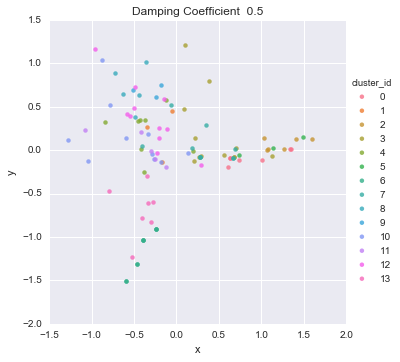

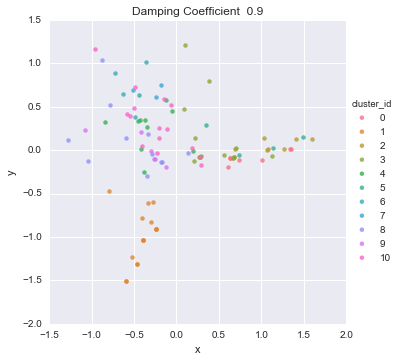

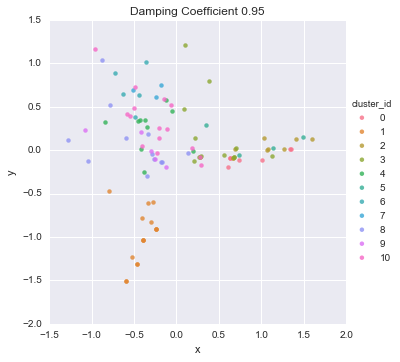

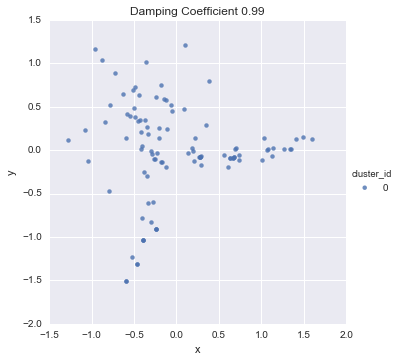

In [12]:
# Trying some additional clustering methods:
# Methods Tried (see below):
# 1.) Affinity Propagation: Vary the Damping Coefficient
# 2.) Spectral Clustering: Vary the Random State

# First, we'll apply Affinity Propagation clustering with different damping coefficients, and plot how the clusters change.
from sklearn.cluster import AffinityPropagation
numberOfIterations = 5;
dampingCoefficients = np.linspace(0.5,0.999,numberOfIterations);
dampingCoefficients = [0.5,0.9,0.95,0.99]
for iteration in dampingCoefficients:
    # Setup affinity propagation from scikit.
    ap = AffinityPropagation(damping=iteration);
    clusteringPrediction = ap.fit_predict(dataArray);

    # Use scikit-learn's PCA function to reduce the dimensionality of your clustering data to 2 components
    pcaClustering = PCA(n_components=2);
    pcaValues=pcaClustering.fit_transform(dataArray)

    # Next create a data frame with the following fields: customer name, cluster id the customer belongs to, the two PCA components (labeled x and y)
    clusteringData=pd.DataFrame([],columns=['customer_name','cluster_id','x','y']);
    clusteringData['customer_name']=df_table.index.values;
    clusteringData['cluster_id']=clusteringPrediction;
    clusteringData['x']=pcaValues[:,0];
    clusteringData['y']=pcaValues[:,1];
    
    # Plot the data into different frames
    sns.lmplot('x', 'y', data=clusteringData, fit_reg=False, hue="cluster_id")
    plt.title("Damping Coefficient {:4.2}".format(iteration));

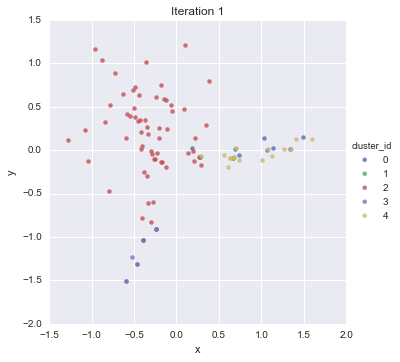

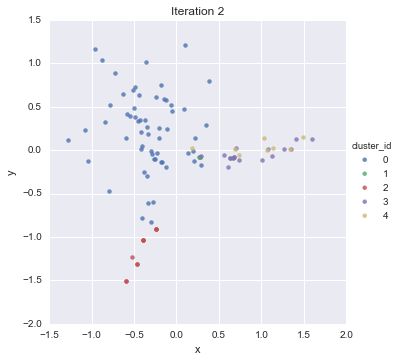

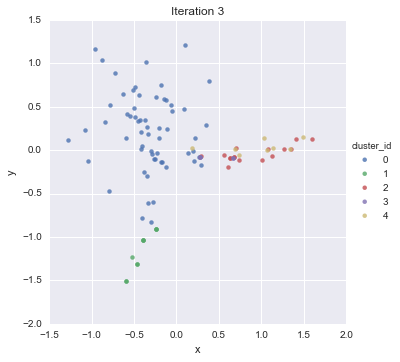

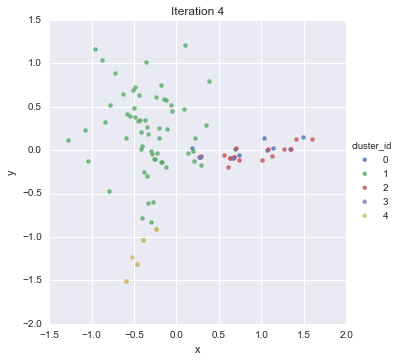

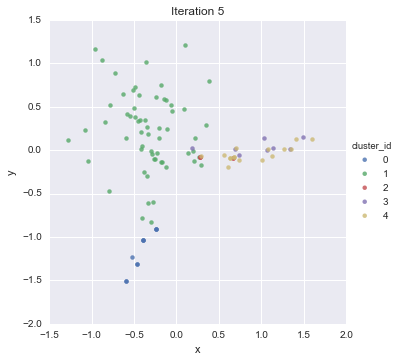

In [41]:
# Second, we'll apply spectral clustering with different initial states, and plot how the clusters change.
from sklearn.cluster import SpectralClustering
numberOfClusters   = 5;
numberOfIterations = 5;

# Use scikit-learn's PCA function to reduce the dimensionality of your clustering data to 2 components
pcaClustering = PCA(n_components=2);
pcaValues=pcaClustering.fit_transform(dataArray)

# Now loop through each cluster
for iteration in range(numberOfIterations):
    # Setup spectral clustering from scikit. 
    spectralClusters=SpectralClustering(n_clusters=numberOfClusters,random_state=iteration,n_init=100);
    clusteringIndices=spectralClusters.fit_predict(dataArray);

    # Next create a data frame with the following fields: customer name, cluster id the customer belongs to, the two PCA components (labeled x and y)
    clusteringData=pd.DataFrame([],columns=['customer_name','cluster_id','x','y']);
    clusteringData['customer_name']=df_table.index.values;
    clusteringData['cluster_id']=clusteringIndices;
    clusteringData['x']=pcaValues[:,0];
    clusteringData['y']=pcaValues[:,1];
    
    # Plot the data into different frames
    sns.lmplot('x', 'y', data=clusteringData, fit_reg=False, hue="cluster_id")
    plt.title("Iteration {}".format(iteration+1));

I tried a couple of additional clustering algorithms, and had mixed performance. Namely I tried two algorithms using graph distance instead of Euclidean distance between points as a metrics: Spectral Clustering and Affinity Propagation. I tried different random states for Spectral Clustering and different damping coefficients for Affinity Propagation, but it was clear that the clusters chosen by these algorithms at least did not reflect a clear breakdrown by the first two principal components. The spectral clustering algorithm provided the most stable results because there was a built-in controller to start with different random states. Also, the spectral clustering resulted in less clusters than the Affinity Propagation method. Finally, I didn't include them in this notebook, but I tried some of the other methods like MeanShift and DBSCAN, but had difficulty in getting the algorithms to find any meaningful clustering. 

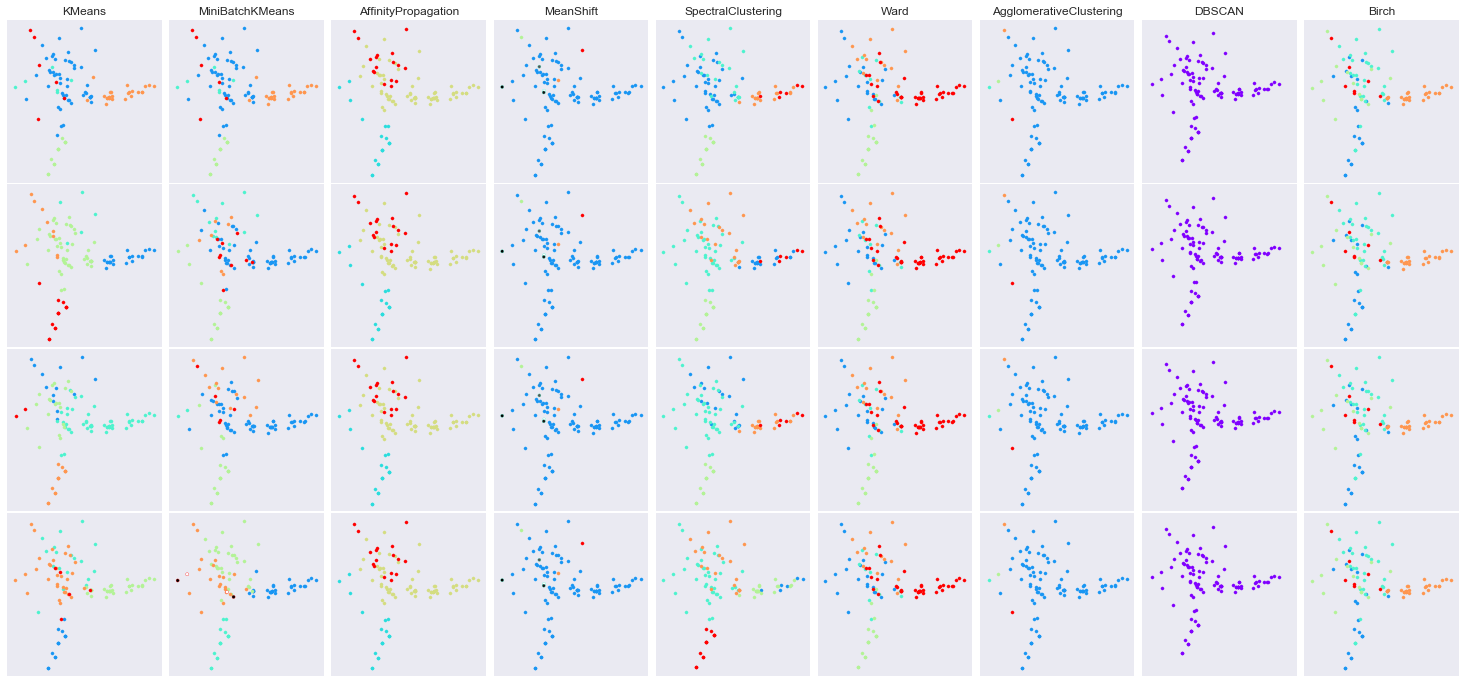

In [172]:
# Finally, I did a more cursory, but bulk comparison of all the clustering methods in Sci-Kit (rather than just affinity propagation and spectral clustering)
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# supress warnings because a known warning is thrown on MiniBatchKMeans 
# (see here: https://stackoverflow.com/questions/36892390/deprecationwarning-in-sklearn-minibatchkmeans)
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

clustering_names = ['KMeans','MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
                    'SpectralClustering', 'Ward', 'AgglomerativeClustering','DBSCAN','Birch']

plt.figure(figsize=(len(clustering_names) * 2 + 3, 9.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1

numberOfClusters   = 5;
numberOfIterations = 4;
for iteration in range(numberOfIterations):    
    # normalize data array for easier parameter selection
    X = dataArray.astype('float64');
    X = StandardScaler().fit_transform(X.astype('float64'))
    
    # set random seed
    np.random.seed(iteration)

    ########################################
    # The following code was adapted code from: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html. This code was chosen to get the parameters grossely correct for each clustering algorithm, and then further fine-tuned in this miniproject.
    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
    
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # create clustering estimators
    affinity_propagation = cluster.AffinityPropagation(damping=.9, preference=-200)
    average_linkage      = cluster.AgglomerativeClustering(n_clusters=numberOfClusters, connectivity=connectivity, linkage="average", affinity="cityblock")
    ward                 = cluster.AgglomerativeClustering(n_clusters=numberOfClusters, connectivity=connectivity, linkage='ward')
    birch                = cluster.Birch(n_clusters=numberOfClusters)
    dbscan               = cluster.DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
    k_means              = cluster.KMeans(n_clusters=clusterSize,random_state=iteration);
    ms                   = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means            = cluster.MiniBatchKMeans(n_clusters=numberOfClusters)
    spectral             = cluster.SpectralClustering(n_clusters=numberOfClusters, eigen_solver='arpack', affinity="nearest_neighbors", random_state=iteration, n_init=100)
    clustering_algorithms = [k_means, two_means, affinity_propagation, ms, spectral, ward, average_linkage, dbscan, birch];
    ########################################
    
    for name, algorithm in zip(clustering_names, clustering_algorithms):
        # predict cluster memberships
        algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            cluster_pred = algorithm.labels_.astype(np.int)
        else:
            cluster_pred = algorithm.predict(X)
        clusterSize = len(np.unique(cluster_pred));

        # plot
        plt.subplot(numberOfIterations, len(clustering_algorithms), plot_num)
        if iteration == 0: 
            plt.title(name, size=12)
        for currentCluster in np.unique(cluster_pred):
            plt.scatter(clusteringData['x'].values[cluster_pred==currentCluster], 
                        clusteringData['y'].values[cluster_pred==currentCluster], 
                        color=getColor(currentCluster+1,clusterSize,'rainbow'), s=10)
            plt.xticks(())
            plt.yticks(())
        plot_num += 1;

plt.show()
warnings.filterwarnings("default", category=DeprecationWarning)

All but the DBSCAN clustering worked to some degree in finding more than a single cluster; however, quite a few of the algorithms also failed to identify any meaningful clusters (MeanShift and AgglomerativeClustering). Though it's perhaps not surprising because these algorithms can be seen not to identify more than a single cluster if the seperation is small (see the last row here where all three of the aforemention algorithms fail to find any clusters: http://scikit-learn.org/stable/modules/clustering.html). 

As for the other algorithms, the original K-Means, Mini-Batch K_means (a slightly less accurate, but faster version of K-means), Affinity Propagation (which has a damping coefficient to prevent too many clusters), Spectral Clustering, and Birch give realistic looking clusters. However, it's clear from the tutorial no one approach is "best". For example, the heirarchal clustering methods like Ward and AgglomerativeClustering work through similar methodologies, but Ward provides more "regular" cluster sizes whereas agglomerative clustering (either mean or complete) leads to uneven cluster sizes.

Arguably one might object to whether the high-dimensional data in the data constitutes "real", meaningful clusters or not. Pre-specifying the number of clusters can allow for flexibility in identifying possibly meaningful relationships, but the quality of the resulting clustering is not guranteed. Arguably the data is best described by perhaps 1-3 clusters, and not the initial 5 suggested in this mini-project. This can be seen by visual inspection of the data plotted again the axes of the first two principal components. There is a central distribution in the upper left, and two tails projecting respectively either to the right or down. 

Finally, one last note is that the first two principal components seem to be represent the bulk of the dataset variance (>70%, see calculation below). Thus, visualizing the clusters along the first two principal components is a pretty good method. However, it's worth being mindful that 30% of the dataset variance isn't captured by the visualization and thus the clustering algorithms may be actually representing real clustering not visually apparent. 

In [171]:
# How much variance of the dataset is explained by the first two-principal components:
print "Dataset variance explained by first two principal components --> {:5.3f}%".format(np.sum(pcaClustering.explained_variance_)*100);

Dataset variance explained by first two principal components --> 71.001%
